## <span style="color:blue"> Ex 12 - Stefano Schmidt </span>

First of all the MNIST dataset is downloaded and manipulated to make it suitable for image recognition. To make them avaiable offline data are saved in files **X_train.npy**, **Y_train.npy**, **X_test.npy** and **Y_test.npy**.

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import keras
import os

from PIL import Image
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
#specyfing properties of the images
img_rows =28 # no of rows
img_cols = 28 # no of columns
num_classes = 10 #10 digits

#loading data
X_train = np.load("X_train.npy")
Y_train = keras.utils.to_categorical(np.load("Y_train.npy"),num_classes)
X_test = np.load("X_test.npy")
Y_test = keras.utils.to_categorical(np.load("Y_test.npy"),num_classes)

#flattening arrays
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### Exercise 12.1
The code in the jupyter-notebook provided is used to build a DNN. Its perfomances are evaluated for different optimizers. Two functions are first defined and then models are compiled and fitted for the different optimizers. Different plots are shown comparing their performances.

In [3]:
def create_DNN():
    "Istantiate a default DNN model."
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [4]:
def plot_performances(model, history, X_test, Y_test,  title_str):
    """Makes a plot for training and validation loss throughout the whole fitting procedure.
    The model must be fitted with X_test and Y_test as validation data."""
    # evaluate performances
    loss = model.evaluate(X_test, Y_test, verbose=0)[0]
    # history for loss
    plt.title("Training set vs. validation set performances: "+title_str)
    plt.plot(history.history['loss'], label = "train")
    plt.plot(history.history['val_loss'], label = "validation")
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(loc='best')
    return

In [5]:
#Summary of the model
model=create_DNN()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.


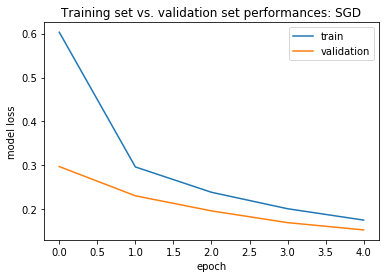

In [6]:
#stochastic gradient descent
N_epochs = 5
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=N_epochs,verbose=0,validation_data=(X_test, Y_test))
plot_performances(model, history, X_test, Y_test, title_str="SGD")

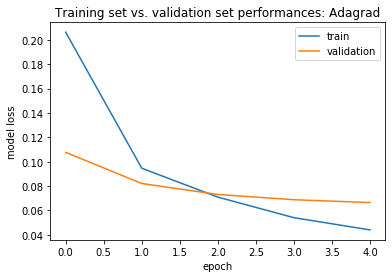

In [7]:
#adaptive gradient algorithm
N_epochs = 5
model=create_DNN()
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adagrad(),metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=N_epochs,verbose=0,validation_data=(X_test, Y_test))
plot_performances(model, history, X_test, Y_test, "Adagrad")

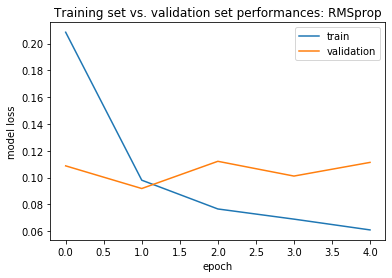

In [8]:
#RMSprop
N_epochs = 5
model=create_DNN()
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=N_epochs,verbose=0,validation_data=(X_test, Y_test))
plot_performances(model, history, X_test, Y_test, "RMSprop")

Comparing the three previous plots it can be seen that RMSprop and Adagrad have very similar performances and in 2-3 epochs they are able to find a good setting of DNN parameters. This can be seen noting that after the two iteration validation score doesn't decrease much (and also might increase): this is a clear sign that the model can't be fitted more. Any futher attempt in fitting will result in overfitting.<br>
This situation is not reached by the sgd optimizer: this means that sgd is slower to converge toward a good solution. In fact its best validation score is higher than the best validation score of theother two methods.

### Exercise 12.2
The Convolutional Neural Network is built by the function `create_CNN` below.<br>
The CNN is fitted as above with Adagrad optimizer (which seemed to have worked better in the previous example) and its performances are represented as above. <br>
Below are also defined two more CNN that might be used to test different performances (function `create_lecture_CNN` and `create_simple_CNN`).

In [9]:
def create_CNN():
    "Istantiate a default CNN model."
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=(img_rows, img_cols, 1)))
        #here shape is 24*24*10
    model.add(MaxPooling2D((3,3))) #stride is default value of (4,4)
        #here shape is 8*8*10
    model.add(Conv2D(5, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=(8, 8, 1)))
        #here shape is 4*4*5
    model.add(Flatten())
            #here shape is 80
    model.add(Dense(100,input_shape=(80,), activation='relu'))
    model.add(Dense(10,input_shape=(100,), activation='softmax'))
    return model

In [10]:
def create_lecture_CNN():
    "Istantiate a the CNN model shown in lectures."
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=(img_rows, img_cols, 1)))
    model.add(MaxPooling2D((2,2))) #stride is default value of (4,4)
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=(8, 8, 1)))
    model.add(MaxPooling2D((2,2))) #stride is default value of (4,4)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [11]:
def create_simple_CNN():
    "Istantiate a CNN model that is simpler than the one in create_CNN."
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=(img_rows, img_cols, 1)))
    model.add(MaxPooling2D((4,4), strides = 4))
    model.add(Flatten())
    model.add(Dense(100,input_shape=(216,), activation='relu'))
    model.add(Dense(10,input_shape=(100,), activation='softmax'))
    return model

First is tested the performance of the "standard" CNN.

In [12]:
model=create_CNN()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 5)           1255      
_________________________________________________________________
flatten_1 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               8100      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 266us/step - loss: 0.2415 - acc: 0.9278 - val_loss: 0.1330 - val_acc: 0.9584
Epoch 2/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.1241 - acc: 0.9634 - val_loss: 0.0972 - val_acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.1039 - acc: 0.9691 - val_loss: 0.0876 - val_acc: 0.9711
Epoch 4/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.0933 - acc: 0.9724 - val_loss: 0.0792 - val_acc: 0.9742
Epoch 5/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.0863 - acc: 0.9741 - val_loss: 0.0734 - val_acc: 0.9752


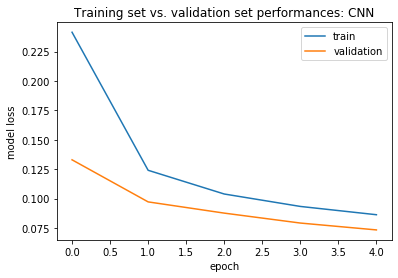

In [13]:
#reshaping the images as 2D images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

#doing training
N_epochs = 5
es = EarlyStopping(monitor="val_loss", mode='min')
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adagrad', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=N_epochs,verbose=1,validation_data=(X_test, Y_test), callbacks=[es])
plot_performances(model, history, X_test, Y_test, "CNN")

The performance of the "simple" CNN is tested below.

In [14]:
simple_model=create_simple_CNN()
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 360)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               36100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 37,370
Trainable params: 37,370
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 227us/step - loss: 0.0692 - acc: 0.9789 - val_loss: 0.0557 - val_acc: 0.9814
Epoch 2/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.0527 - acc: 0.9845 - val_loss: 0.0503 - val_acc: 0.9841
Epoch 3/5
60000/60000 [==============================] - 13s 213us/step - loss: 0.0477 - acc: 0.9860 - val_loss: 0.0468 - val_acc: 0.9839
Epoch 4/5
60000/60000 [==============================] - 13s 213us/step - loss: 0.0446 - acc: 0.9869 - val_loss: 0.0455 - val_acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 13s 214us/step - loss: 0.0419 - acc: 0.9879 - val_loss: 0.0441 - val_acc: 0.9856


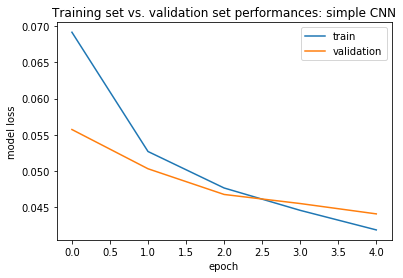

In [16]:
es = EarlyStopping(monitor="val_loss", mode='min')
simple_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adagrad', metrics=['accuracy'])
simple_history = simple_model.fit(X_train, Y_train, epochs=N_epochs,verbose=1,validation_data=(X_test, Y_test), callbacks=[es])
plot_performances(simple_model, simple_history, X_test, Y_test, "simple CNN")

From what it can be seen the "simple CNN" (defined in function `create_simple_CNN`) seems to work a bit better than the standard one since it has a lower validation loss (0.0441 vs. 0.0734).

### Exercise 12.3
Picture of custom numbers are in the folder **pictures**. The pictures are loaded and evaluated with the fitted model.

In [17]:
#loading picture into matrix X_pictures
folder = "./pictures/"
files = os.listdir(folder)
X_pictures = np.zeros((len(files),img_rows,img_cols,1))
index = 0

for file in files:
    digit_filename = folder+file
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    for j in range(ydim):
        for i in range(xdim):
            X_pictures[index,i,j,0]=copy.copy(pix[j,i]/255)
    index = index +1

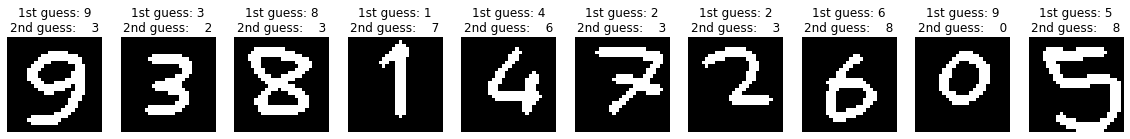

In [18]:
#making predictions and plotting them
predictions = simple_model.predict(X_pictures)

plt.figure(figsize=(20, 18)) 
for i in range(10): 
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_pictures[i, :, :, 0], cmap='gray')    
    plt.title("Predicted:  "+str(np.argmax(predictions[i])))
    plt.title("1st guess: {}\n2nd guess:    {}".format(np.argsort(-predictions[i])[0], np.argsort(-predictions[i])[1]))
    plt.axis('off') 
plt.show()

The code is able to recognize letters in a big number of cases: in 9/10 the actual number is one the first two best guesses. The model only failed to recognize the number 7. This is probably beacause in the training set 7 is only present without the bar.